In [2]:
# !pip install tensorflow numpy pillow opencv-python

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU usage
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import cv2  # OpenCV for image handling
import matplotlib.pyplot as plt  # For visualizing the image

print("Running TensorFlow on CPU.")

Running TensorFlow on CPU.


In [4]:
# Load the pre-trained model
model = load_model("/home/aromal/Documents/ML_Projects/cat-v-dog/final_model.keras")
print("Model loaded successfully!")


2025-01-28 22:10:01.712384: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model loaded successfully!


In [5]:
def preprocess_image(image_path, target_size):
    """
    Preprocess the image for model prediction:
    - Resize to match training input size
    - Normalize pixel values
    - Add batch dimension
    """
    # Read the image using OpenCV
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Error: Unable to load image at path: {image_path}")

    # Convert the image to RGB (OpenCV loads images in BGR format)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Resize the image to match the input size of the model
    img = cv2.resize(img, target_size)
    # Normalize pixel values to [0, 1]
    img = img / 255.0
    # Add a batch dimension (1, height, width, channels)
    img = np.expand_dims(img, axis=0)
    return img


In [34]:
# Path to your test image
image_path = "/home/aromal/Documents/ML_Projects/cat-v-dog/cat2.jpeg"  # Replace with the actual image file path

# Preprocess the image (input size matches your training setup)
input_size = (256, 256)  # Match the image_size used during training
preprocessed_image = preprocess_image(image_path, target_size=input_size)

# Make predictions using the model
predictions = model.predict(preprocessed_image)

# Interpret the prediction (0 = Cat, 1 = Dog)
predicted_class = np.argmax(predictions, axis=1)[0]
class_names = {0: "Cat", 1: "Dog"}
predicted_label = class_names[predicted_class]

# Display the predictions
print(f"Raw Predictions: {predictions}")
print(f"Predicted Class: {predicted_label}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Raw Predictions: [[4.8533282e-05]]
Predicted Class: Cat


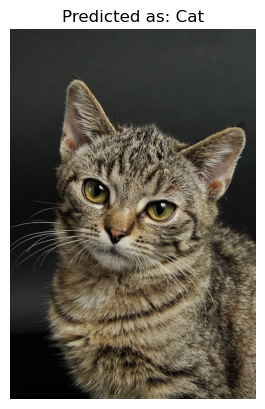

In [36]:
# Load the image for display
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Display the image
plt.imshow(img_rgb)
plt.axis("off")
plt.title(f"Predicted as: {predicted_label}")
plt.show()
